<a href="https://colab.research.google.com/github/RufinoMartin/Diabetes/blob/main/Diabetes_Analysis_%26_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

The analytics and visualizations developed in this notebook are a brief glimpse of what patients and doctors could use daily for treating Diabetes more accurately. 

Doctors, with the help of medical devices, measure key health indicators, which in turn are organized, combined and analysed through a Data Pipeline. 

Potentially, treatments are boosted with immediate analytics, clear visuals that that keep the risk-patients aware, and machine learning models that help to predict outcomes, bringing even more caution and clarity to medical diagnoses and treatments. 

Author: Rufino Martin, Psychologist and Data Analyst. 

# Introduction


**Diabetes** is a chronic, metabolic disease characterized by elevated levels of blood glucose (or blood sugar), which leads over time to serious damage to the heart, blood vessels, eyes, kidneys and nerves. (WHO)

**Types**: The most common types of diabetes are type 1, type 2, and gestational diabetes.

**Type 1 diabetes** : your body does not make insulin. Your immune system attacks and destroys the cells in your pancreas that make insulin. Is usually diagnosed in children and young adults, although it can appear at any age. People with type 1 diabetes need to take insulin every day to stay alive.

**Type 2 diabetes** : Your body does not make or use insulin well. You can develop type 2 diabetes at any age, even during childhood. However, this type of diabetes occurs most often in middle-aged and older people. Type 2 is the most common type of diabetes.

**Gestational diabetes** : Develops in some women when they are pregnant. Most of the time, this type of diabetes goes away after the baby is born. However, if you’ve had gestational diabetes, you have a greater chance of developing type 2 diabetes later in life. Sometimes diabetes diagnosed during pregnancy is actually type 2 diabetes.

Other types of diabetes Less common types include monogenic diabetes, which is an inherited form of diabetes, and cystic fibrosis-related diabetes ."

**Epidemiology:** about 422 million people worldwide have diabetes. Since diabetes affects a large population across the globe and the collection of these datasets is a continuous process and it comprises of various patient related attributes such as age, gender, symptoms, insulin levels, blood pressure, blood glucose levels, weight etc. 

**Dataset:** Pima Indians Diabetes Dataset (PIDD), extracted from the University of California, Irvine (UCI) machine learning repository.
( [https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database](https://) )

**Population:** Pima People are North American Indians who traditionally lived along the Gila and Salt rivers in Arizona, U.S., in what was the core area of the prehistoric Hohokam culture.




# Library Import

In [ ]:
# Data management

import pandas as pd
import numpy as np

# Visualizations

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from seaborn import distplot
from seaborn import boxplot
from seaborn import violinplot
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
py.init_notebook_mode(connected=True)
%matplotlib inline


# Warnings

import warnings
warnings.filterwarnings('ignore')

# Data Acquisition

RAW Url from repository to run notebook : https://github.com/RufinoMartin/Diabetes/blob/main/diabetes.csv


In [ ]:
# Data Load

df = pd.read_csv('https://raw.githubusercontent.com/RufinoMartin/Diabetes/main/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Wrangling

In [ ]:
# Rename DiabetesPedigreeFunction column to DPF for practical purposes

df.rename(columns={'DiabetesPedigreeFunction':'DPF'}, inplace = True)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age  Outcome  
0   50        1  
1   31        0  
2   32        1  
3   21        0  
4   33        1

In [ ]:
# Variable type conversion: DPF to Integer.

df["DPF"] = pd.to_numeric(df["DPF"])

In [ ]:
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome            int64
dtype: object

In [ ]:
# Rename 'Outcome' booleans: 1 to 'Diab' & 0 to'Non-Diab'

df.Outcome = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

In [ ]:
# Dataframe dimension (rows, columns)
df.shape

(768, 9)

In [ ]:
# Data Types

df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome           object
dtype: object

In [ ]:
# Fields x Column

df.count()

Pregnancies      768
Glucose          768
BloodPressure    768
SkinThickness    768
Insulin          768
BMI              768
DPF              768
Age              768
Outcome          768
dtype: int64

In [ ]:
# More Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
# Basic Statistics

df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI         DPF         Age  
count  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885  
std      7.884160    0.331329   11.760232  
min      0.000000    0.078000   21.000000  
25%     27.300000    0.243750   24.000000  
50%     32.000000    0.372500   29.000000  
75%     36.600000    0.626250   41.000000  
max     67.100000    2.420000   81.000000

- count tells us the number of NoN-empty rows in a feature.
- mean tells us the mean value of that feature.
- std tells us the Standard Deviation Value of that feature.
- min tells us the minimum value of that feature.
- 25%, 50%, and 75% are the percentile/quartile of each features. This quartile - information helps us to detect Outliers.
- max tells us the maximum value of that feature.

In [ ]:
# Pivoting describe function for better perspective

df.describe().T

count        mean         std     min       25%       50%  \
Pregnancies    768.0    3.845052    3.369578   0.000   1.00000    3.0000   
Glucose        768.0  120.894531   31.972618   0.000  99.00000  117.0000   
BloodPressure  768.0   69.105469   19.355807   0.000  62.00000   72.0000   
SkinThickness  768.0   20.536458   15.952218   0.000   0.00000   23.0000   
Insulin        768.0   79.799479  115.244002   0.000   0.00000   30.5000   
BMI            768.0   31.992578    7.884160   0.000  27.30000   32.0000   
DPF            768.0    0.471876    0.331329   0.078   0.24375    0.3725   
Age            768.0   33.240885   11.760232  21.000  24.00000   29.0000   

                     75%     max  
Pregnancies      6.00000   17.00  
Glucose        140.25000  199.00  
BloodPressure   80.00000  122.00  
SkinThickness   32.00000   99.00  
Insulin        127.25000  846.00  
BMI             36.60000   67.10  
DPF              0.62625    2.42  
Age             41.00000   81.00

# Missing Values

Some features contain 0-values. As it means missing field and not really 0, we replace 0 value by NaN :

In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(df_copy.isnull().sum())

Pregnancies        0
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64


Lots of missing values, speccially for the SkinThickness and Insulin variables. Continuing without filling this data will result in loss of validty. We proceed to attempt an adhoc Nan Filling.

We plot the data distribution in order to fill de NaN values accordingly.

Firts we plot the data as it was acquired (plot), then we plot our filled data (plot1)

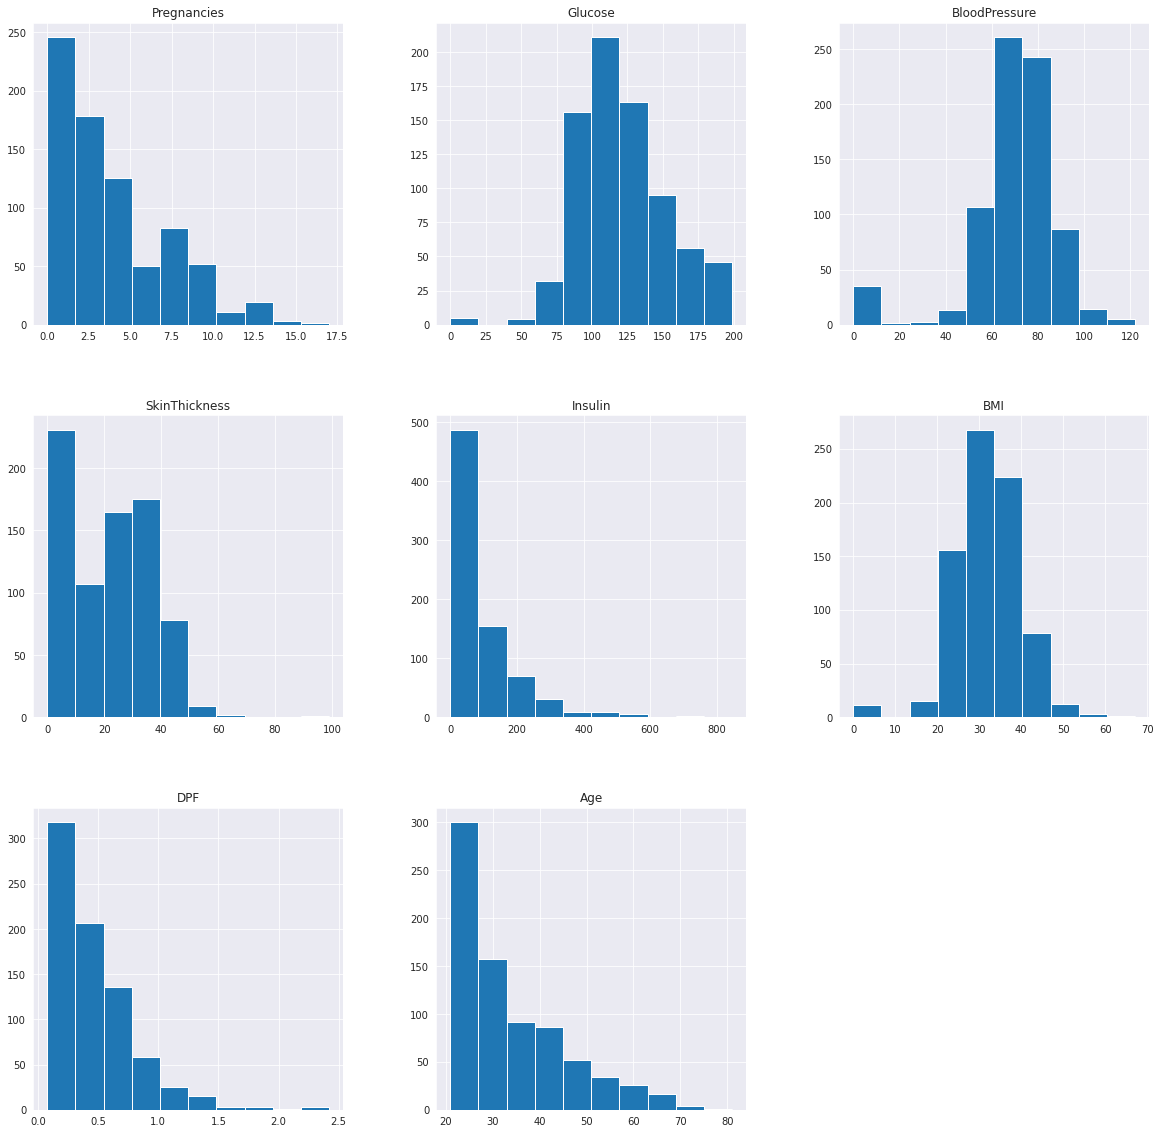

In [ ]:
plot = df.hist(figsize = (20,20))

In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

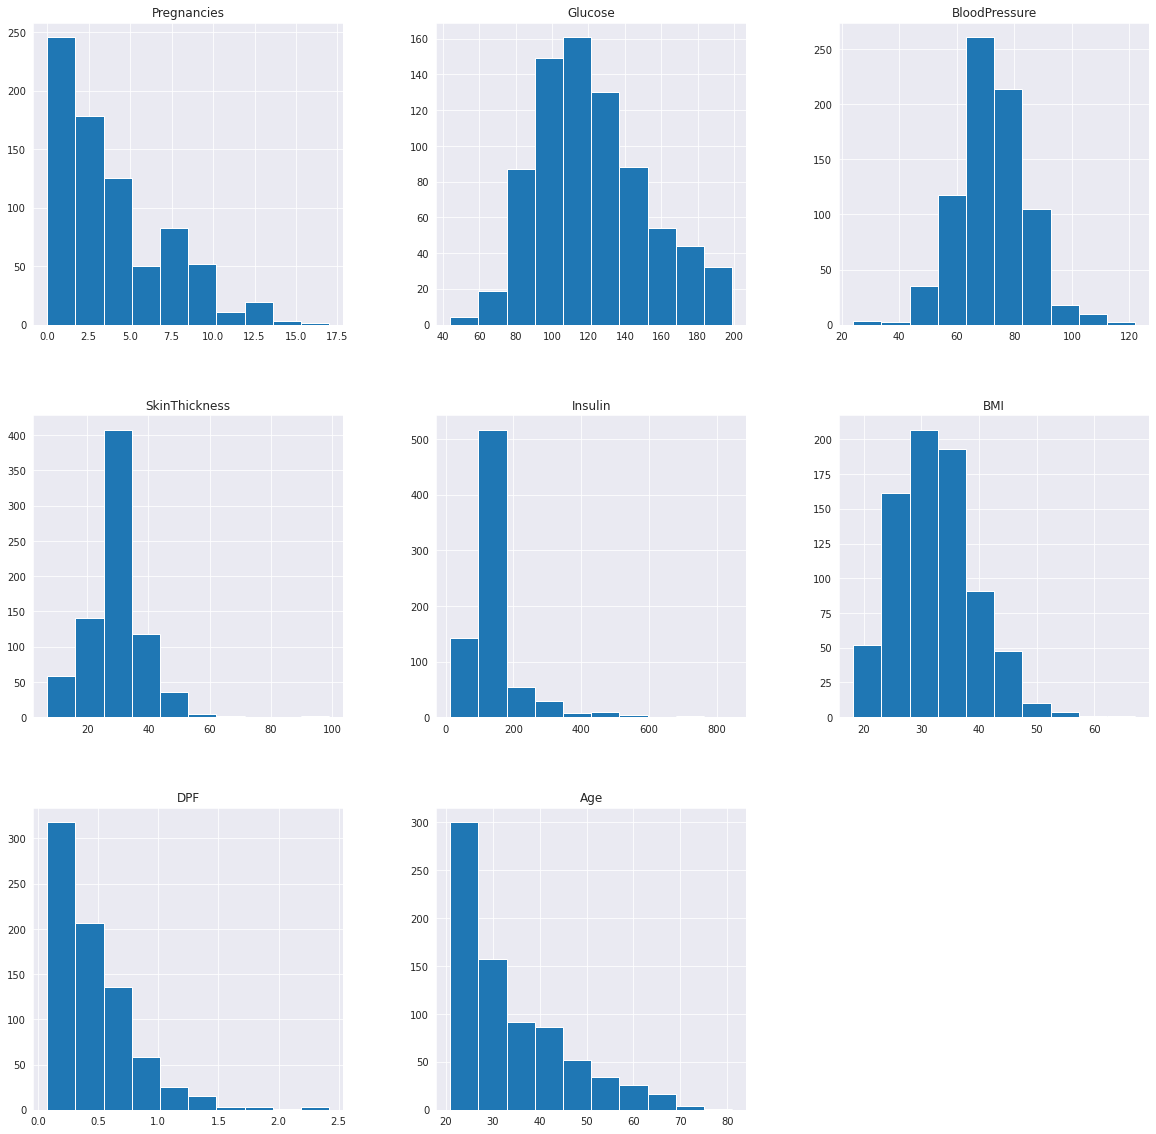

In [ ]:
plot1 = df_copy.hist(figsize = (20,20))

## Skewness

- A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

- A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.

Finally, we continue to operate with our Nan-Filles-Dataframe: df_copy

In [ ]:
df_copy.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    float64
 2   BloodPressure  768 non-null    float64
 3   SkinThickness  768 non-null    float64
 4   Insulin        768 non-null    float64
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB


# Data Summary

- Health-Sector related dataset: Presence of variables among a Diabetic and Non Diabetic Population. 
- 768 fields & 9 variables.
- No missing values. 

## Variable definition: 

- Pregnancies: Number of times pregnant.

- Glucose: set in mg/dL.

- Blood pressure: set in mm/Hg. Likely DBP (diastolic blood pressure) based on numbers.

- Skinthickness: Number of mm that triceps skin-fold.

- Insulin: set in mu U/ml.

- BMI (Body Mass Index): set in kg/m2

- DPF: (DiabetesPedigree) likelihood of having diabetes based on familial history

- Age: set in years

- Outcome: Diabetic & Non-Diabetic (Target Variable)

# Univariate Exploratory Analysis

We proceed to inspect interesting isolated variables, in order to get a glimpse of it value´s distribution throughout the dataframe.

## Outcome: Diabetic & Non-Diabetic

In [ ]:
df_Outcome = df_copy['Outcome'].value_counts()
df_Outcome

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64

In [ ]:
# Lets calculate the prevalence %

quotient = 268 / 768
percent = quotient * 100
print("The % of Diabetes in the sample is" , percent)

The % of Diabetes in the sample is 34.89583333333333


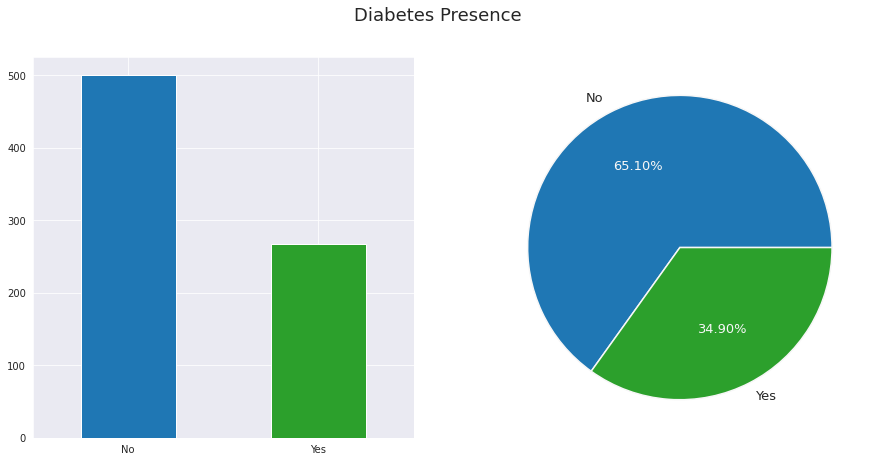

In [ ]:
# Lets Plot it:

f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes Presence", fontsize = 18.)
_ = df_copy.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df_copy.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

Meaning 1/3 of Pima Indians individuals in the study sample sufferered from diabetes at the time.

## Pregnancies

In [ ]:
df_copy.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

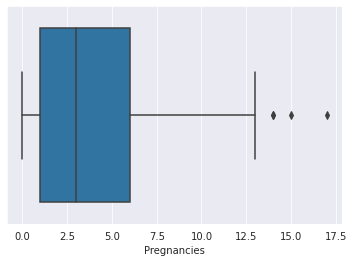

In [ ]:

boxplot(df_copy.Pregnancies, orient="v")

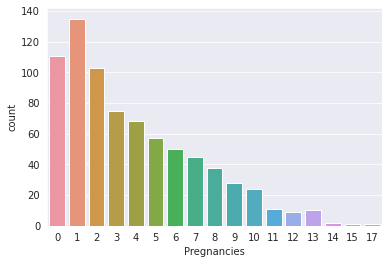

In [ ]:
sns.countplot(df_copy['Pregnancies'])

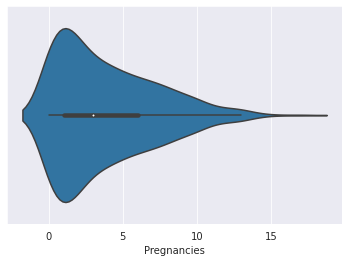

In [ ]:
from seaborn import violinplot
violinplot(df_copy.Pregnancies, data=df_copy , orient="v")

## Glucose 

In [ ]:
df_copy.Glucose.describe()

count    768.000000
mean     121.686763
std       30.435949
min       44.000000
25%       99.750000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

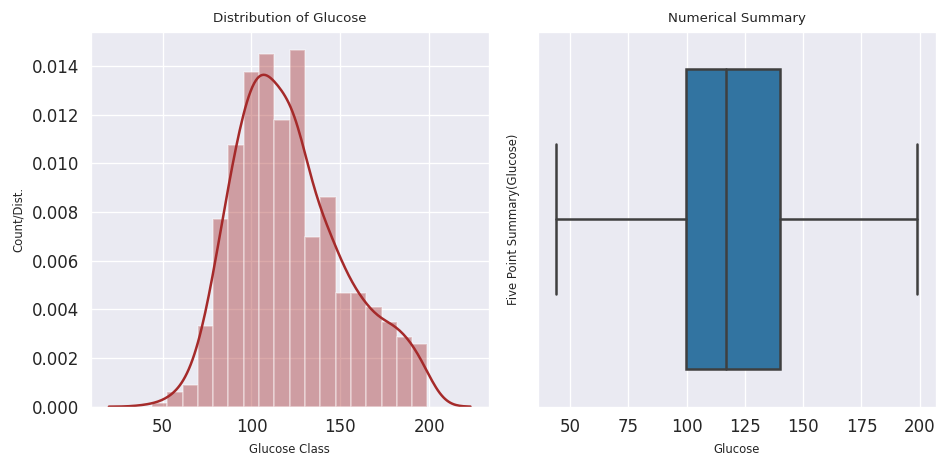

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['Glucose']!=0]['Glucose'],ax=axes[0],color='brown')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Glucose',fontdict={'fontsize':8})
axes[0].set_xlabel('Glucose Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['Glucose']!=0]['Glucose'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Glucose',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Glucose)',fontdict={'fontsize':7})
plt.tight_layout()

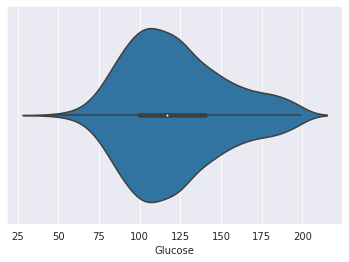

In [ ]:
from seaborn import violinplot
violinplot(df_copy.Glucose, data=df_copy , orient="v")

## Blood Pressure

In [ ]:
df_copy.BloodPressure.describe()

count    768.000000
mean      72.405184
std       12.096346
min       24.000000
25%       64.000000
50%       72.202592
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

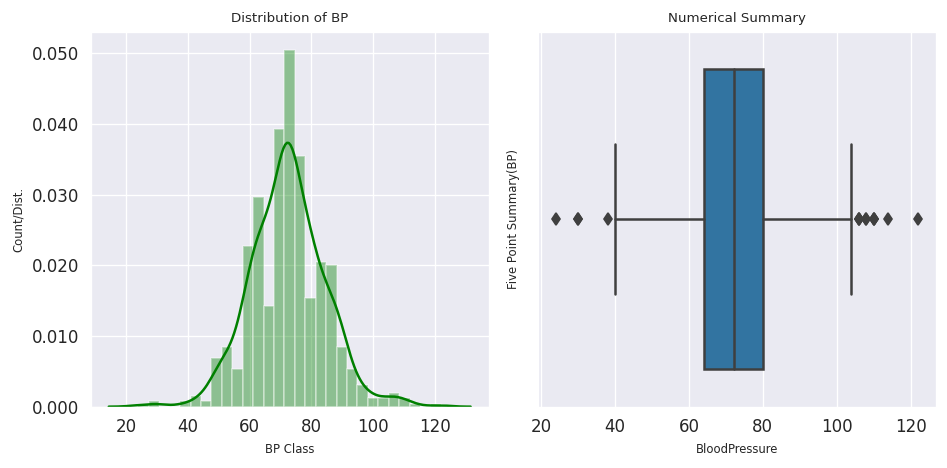

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['BloodPressure']!=0]['BloodPressure'],ax=axes[0],color='green')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BP',fontdict={'fontsize':8})
axes[0].set_xlabel('BP Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['BloodPressure']!=0]['BloodPressure'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BloodPressure',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BP)',fontdict={'fontsize':7})
plt.tight_layout()

## SkinThickness

In [ ]:
df_copy.SkinThickness.describe()

count    768.000000
mean      29.108073
std        8.791221
min        7.000000
25%       25.000000
50%       29.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

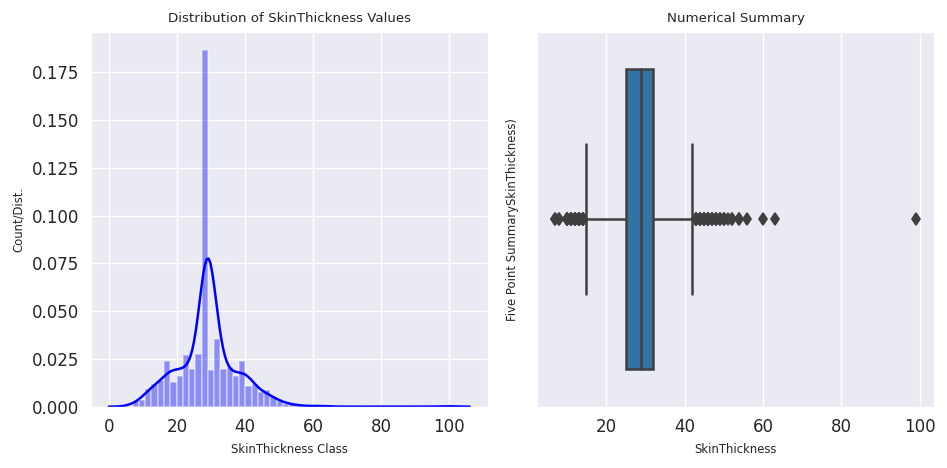

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['SkinThickness']!=0]['SkinThickness'],ax=axes[0],color='blue')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of SkinThickness Values',fontdict={'fontsize':8})
axes[0].set_xlabel('SkinThickness Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['SkinThickness']!=0]['SkinThickness'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('SkinThickness',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point SummarySkinThickness)',fontdict={'fontsize':7})
plt.tight_layout()

## Insulin

In [ ]:
df_copy.Insulin.describe()

count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

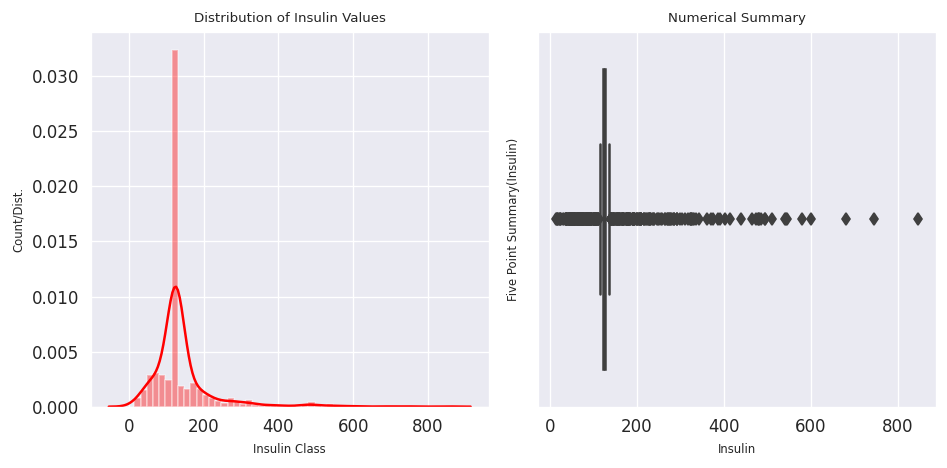

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['Insulin']!=0]['Insulin'],ax=axes[0],color='red')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Insulin Values',fontdict={'fontsize':8})
axes[0].set_xlabel('Insulin Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['Insulin']!=0]['Insulin'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Insulin',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Insulin)',fontdict={'fontsize':7})
plt.tight_layout()

## BMI

In [ ]:
df_copy.BMI.describe()

count    768.000000
mean      32.455208
std        6.875177
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

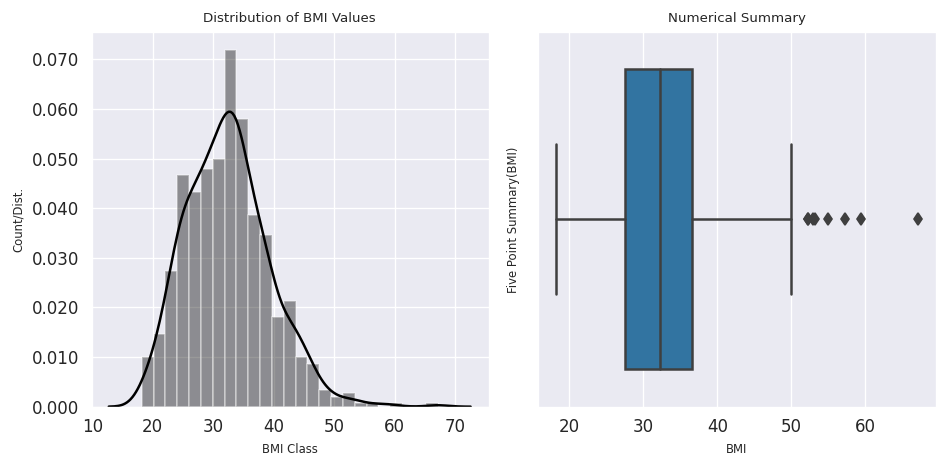

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['BMI']!=0]['BMI'],ax=axes[0],color='black')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of BMI Values',fontdict={'fontsize':8})
axes[0].set_xlabel('BMI Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['BMI']!=0]['BMI'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('BMI',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(BMI)',fontdict={'fontsize':7})
plt.tight_layout()

## DPF (Diabetes Pedigree Familiar)

In [ ]:
df_copy.DPF.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DPF, dtype: float64

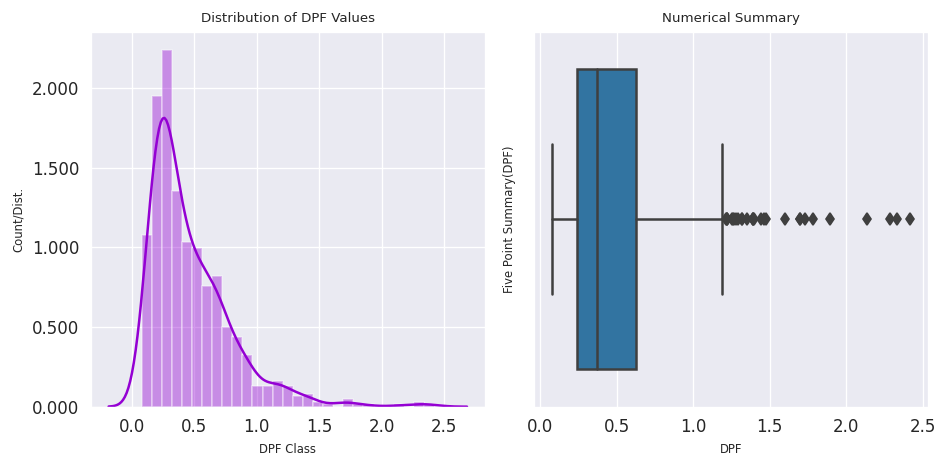

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['DPF']!=0]['DPF'],ax=axes[0],color='darkviolet')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of DPF Values',fontdict={'fontsize':8})
axes[0].set_xlabel('DPF Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['DPF']!=0]['DPF'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('DPF',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(DPF)',fontdict={'fontsize':7})
plt.tight_layout()

Annotations for further analysis: The DPF and Insulin plots look much alike, filled with right-handed outlierts. 

## Age

In [ ]:
df_copy.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

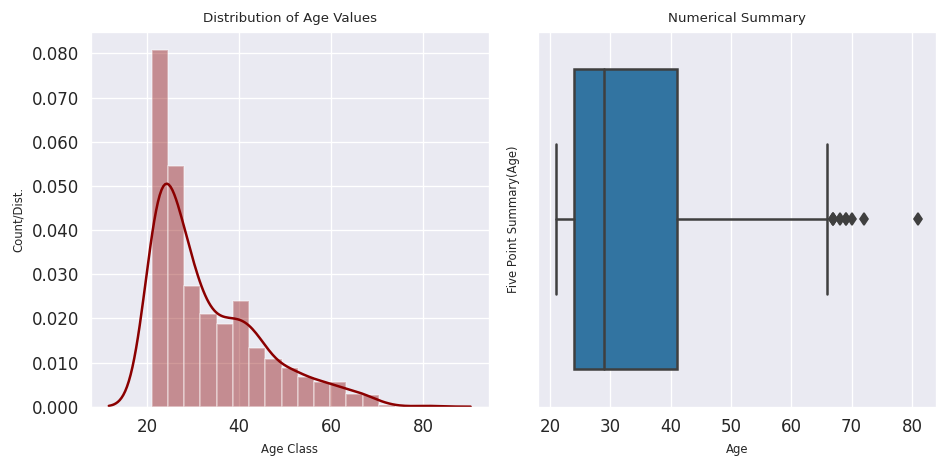

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=2,dpi=120,figsize = (8,4))

plot0=sns.distplot(df_copy[df_copy['Age']!=0]['Age'],ax=axes[0],color='darkred')
axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axes[0].set_title('Distribution of Age Values',fontdict={'fontsize':8})
axes[0].set_xlabel('Age Class',fontdict={'fontsize':7})
axes[0].set_ylabel('Count/Dist.',fontdict={'fontsize':7})
plt.tight_layout()

plot1=sns.boxplot(df_copy[df_copy['Age']!=0]['Age'],ax=axes[1],orient='v')
axes[1].set_title('Numerical Summary',fontdict={'fontsize':8})
axes[1].set_xlabel('Age',fontdict={'fontsize':7})
axes[1].set_ylabel(r'Five Point Summary(Age)',fontdict={'fontsize':7})
plt.tight_layout()

Annotations: The population its remarkably asymmetric: most sample values belong to youngsters. Key to further analysis. 

## Univariate Summary

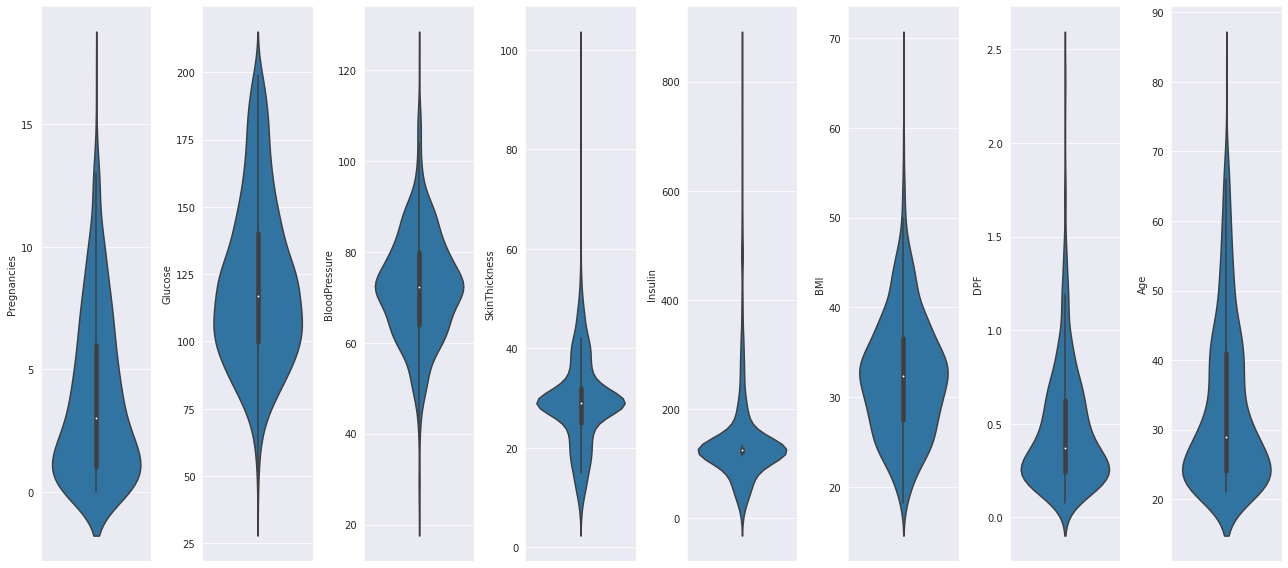

In [ ]:
variables = ['Pregnancies', 'Glucose',
             'BloodPressure', 'SkinThickness', 
             'Insulin','BMI','DPF', 'Age']

fig, axes = plt.subplots(1, len(variables), figsize=(18,8))
for ax, variable in zip(axes, variables):
    ax = sns.violinplot( y=variable, data=df_copy, ax=ax)
plt.tight_layout()

Given that each variable has a unique scale, due to quantity and measure specificities, we will next use multivariate analysis tools that automatically keep and compare variables while conserving their scales. 

Nontheless, this Univariate Summary could very well be displayed at a doctor/patient Diabetes-App, to keep track of levels and evolution of each variable. 

# Multivariate Exploratory Analysis

We now use a set of statistical tools by considering several data variables simultaneously. More *complex data patterns and phenomena* can be discovered through Multivariate analysis. It also offers an increase in *validity*, this is, we will get better at "measuring what we pretend to be measuring". Applied to this study, we get clearer insights on which variables (or combinations of them) explain a diabetic outcome and up to which extent they do. 

## Pairplots

Paitplots offer rapid insights on relationships between all included variables in dataset.



### #1 : Free-For-All Pairplot

<Figure size 1200x800 with 0 Axes>

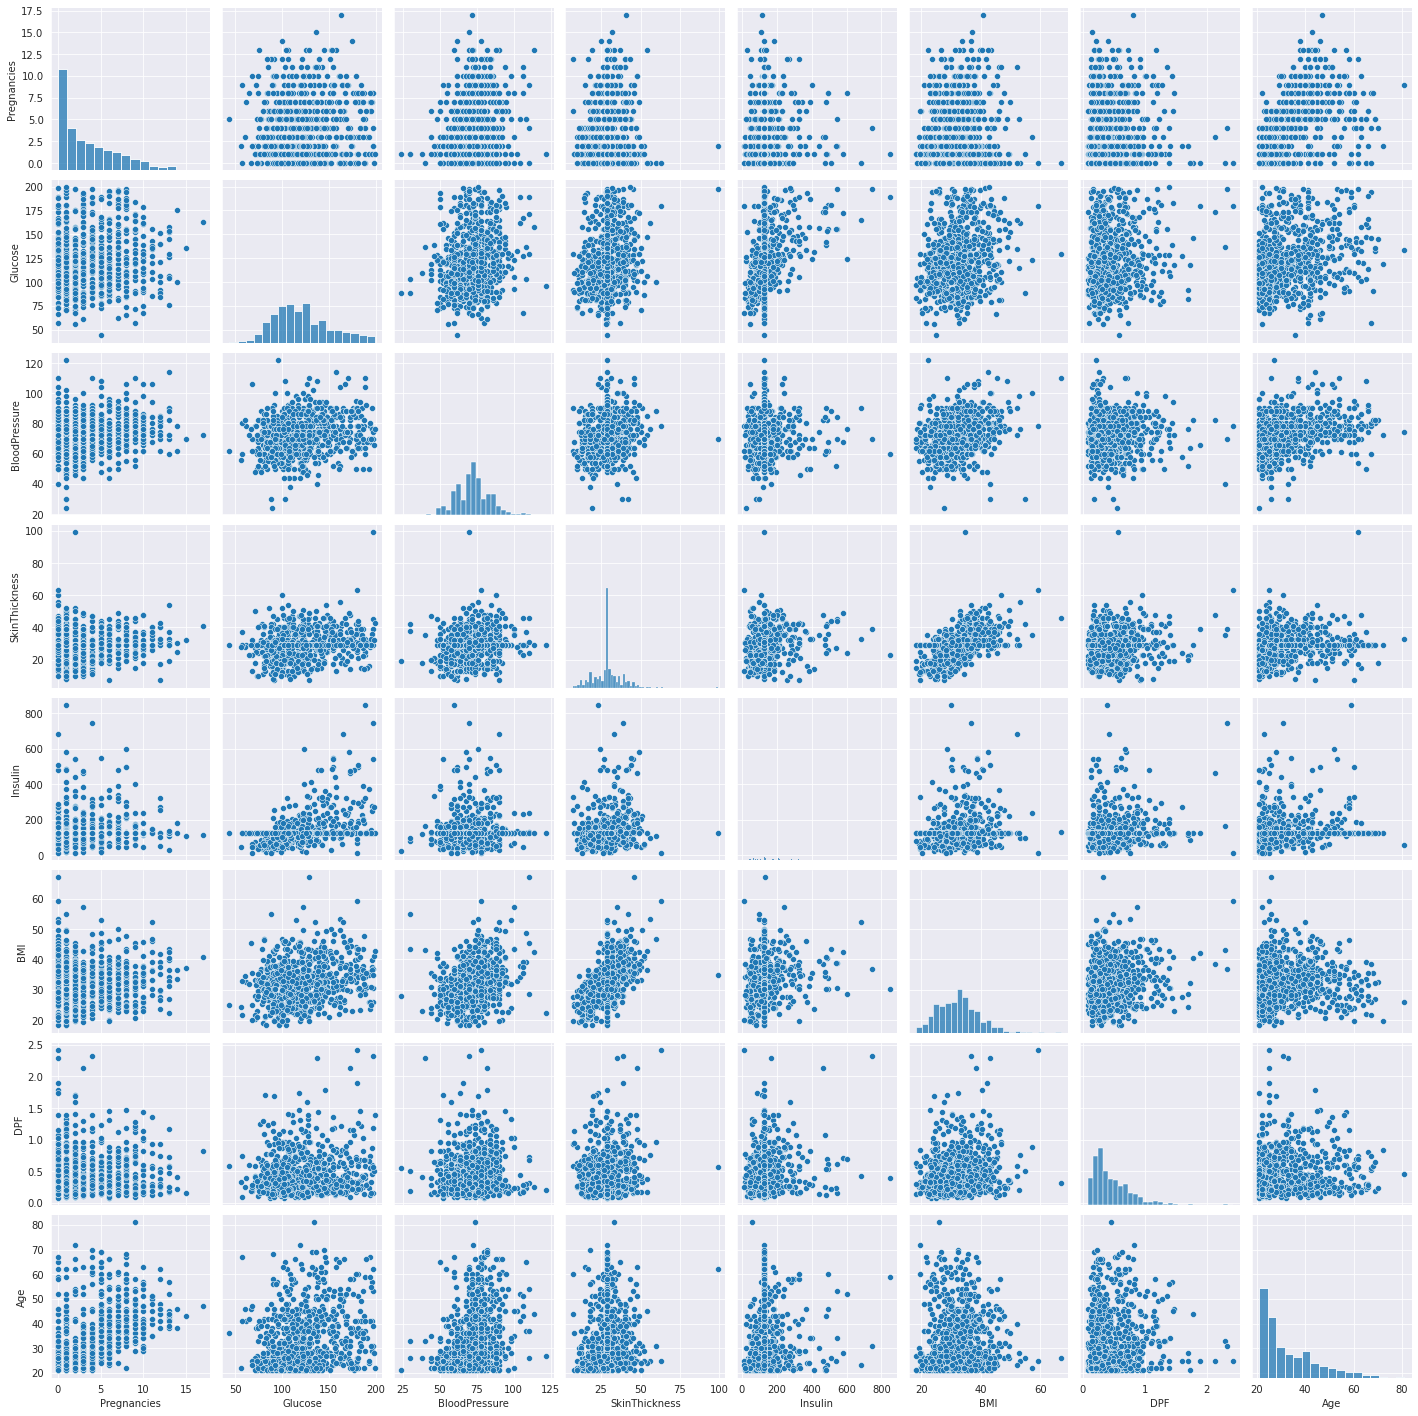

In [ ]:

plt.figure(dpi=200)
sns.pairplot(df_copy)
plt.show()

### #2 : Regression Pairplot

The linea regression trend will show whether a variable has a positive, negative, weak or strong correlation with other variables. 

<Figure size 1200x800 with 0 Axes>

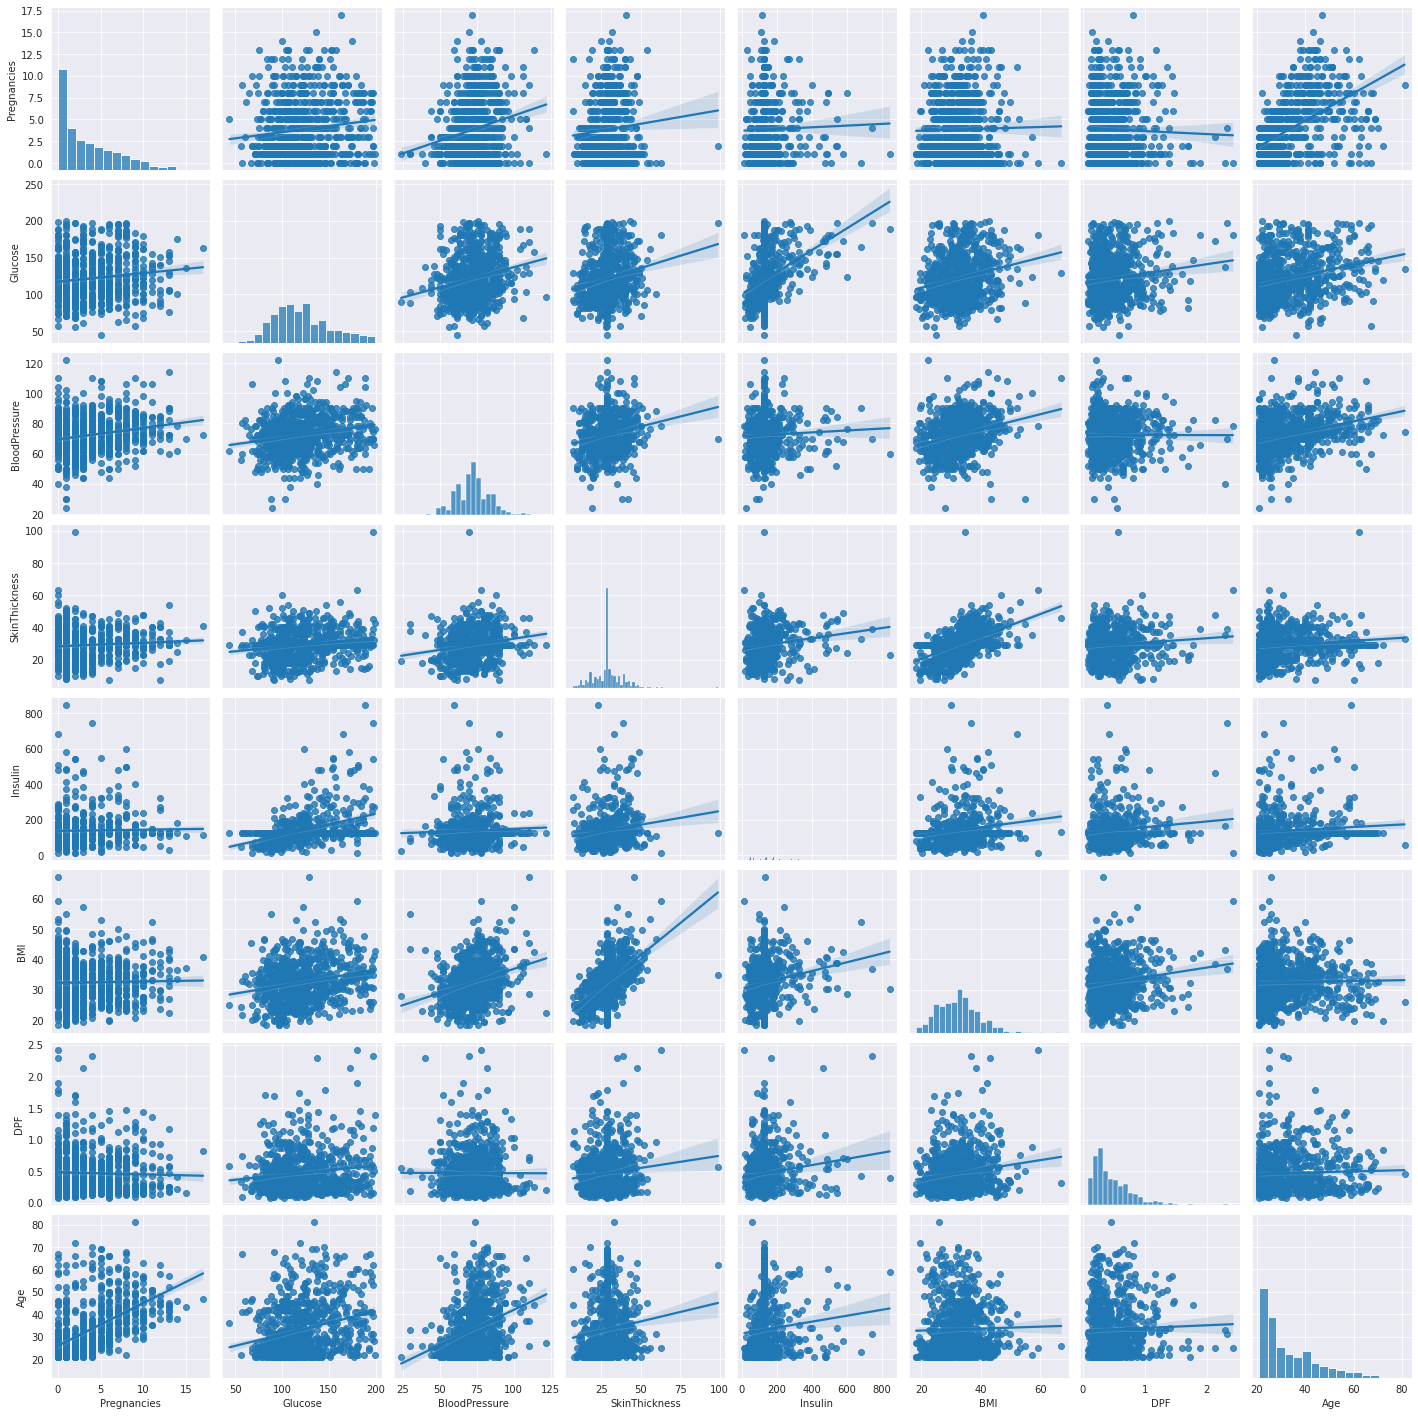

In [ ]:

plt.figure(dpi=200)
sns.pairplot(df_copy, kind = 'reg', palette='lime')
plt.show()

### #3:  Outcome Pairplot

Huing with the outcome variable, we get the distribution and clustering of values belonging diabetic and non-diabetic. 

<Figure size 1200x800 with 0 Axes>

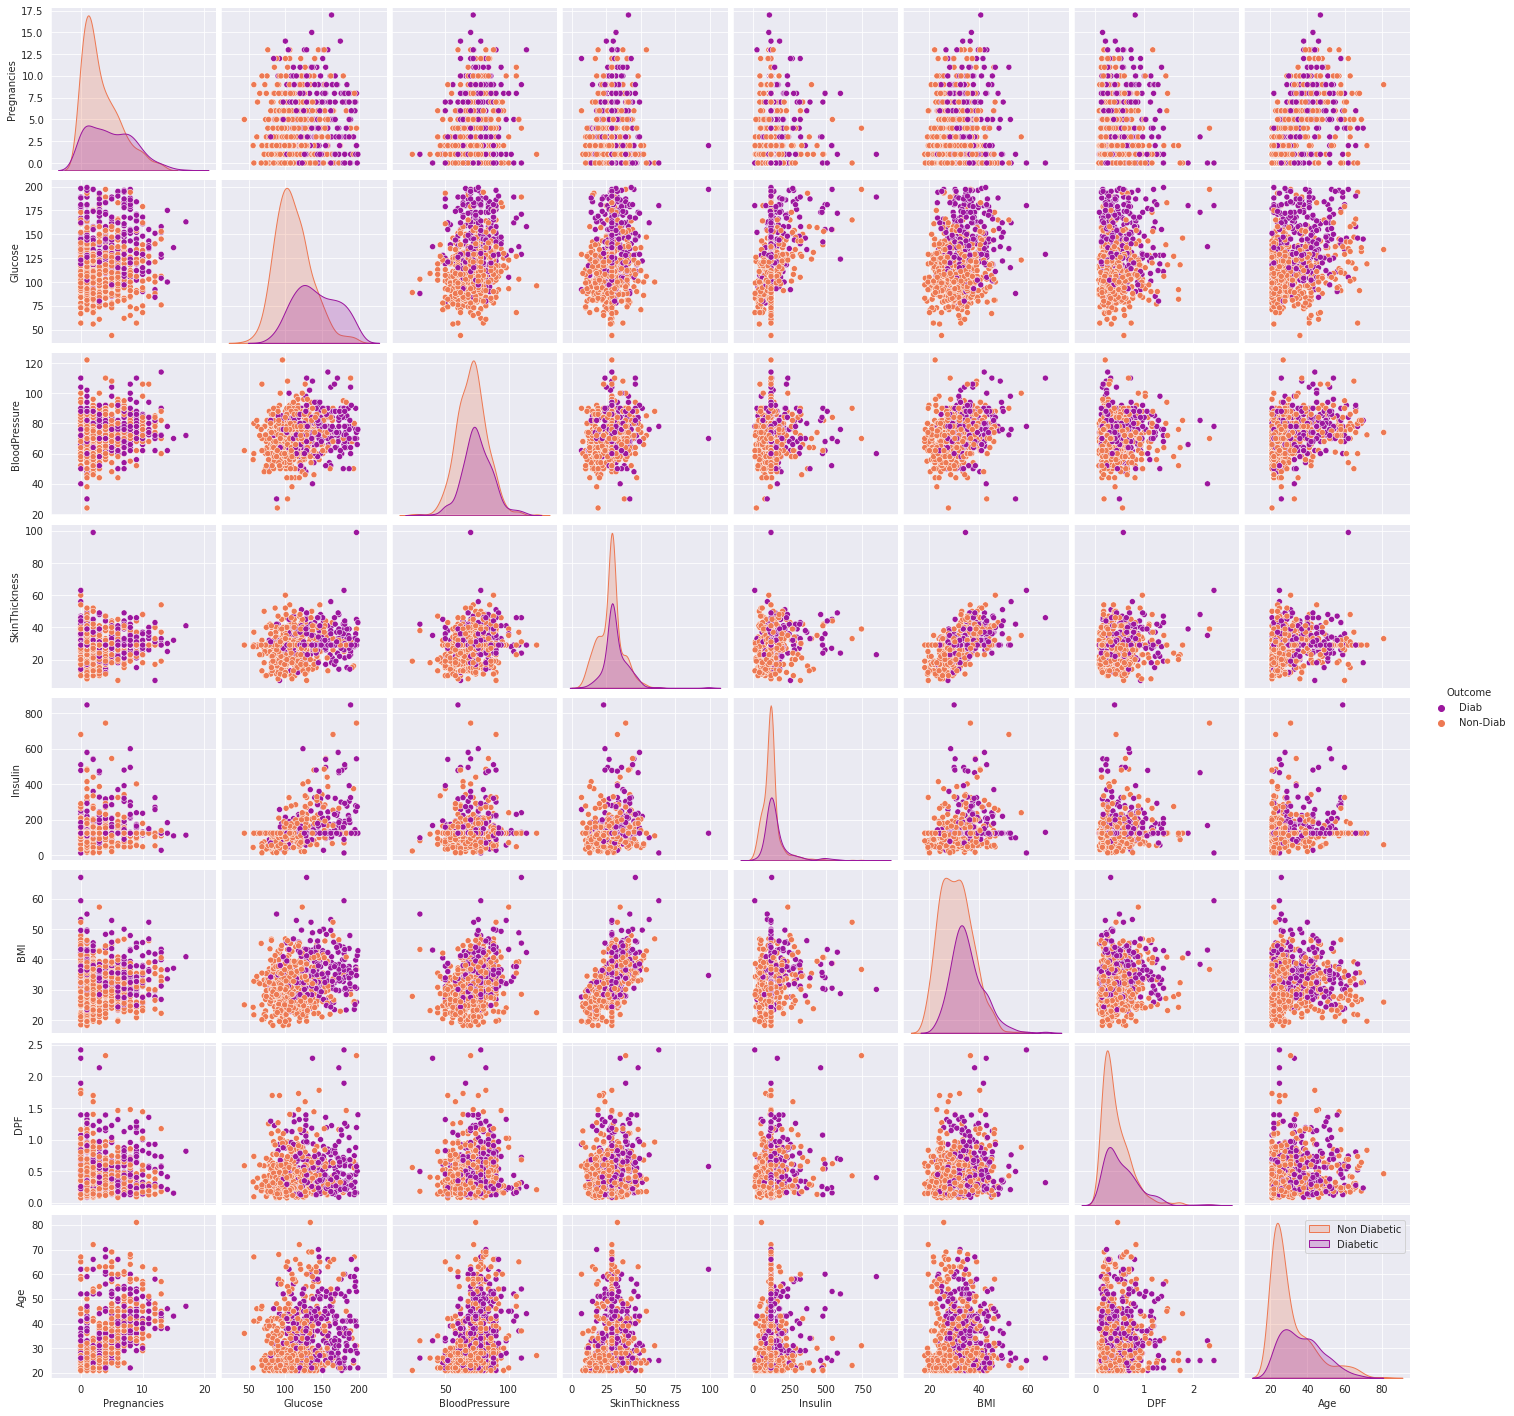

In [ ]:

plt.figure(dpi = 200)
sns.pairplot(df_copy,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

Ideally, what we would love to see as of diagnostic purposes, are two well-defined, separated color clusters. Its eye-catching that thats not the case: there is presumably no clear isolated *"responsible-variable"* for a Diabetes-positive-Outcome. 
Nonetheless, we will develop more focalized further analysis from this plot´s invitation. Some zoom-ins:
 

<Figure size 1800x1200 with 0 Axes>

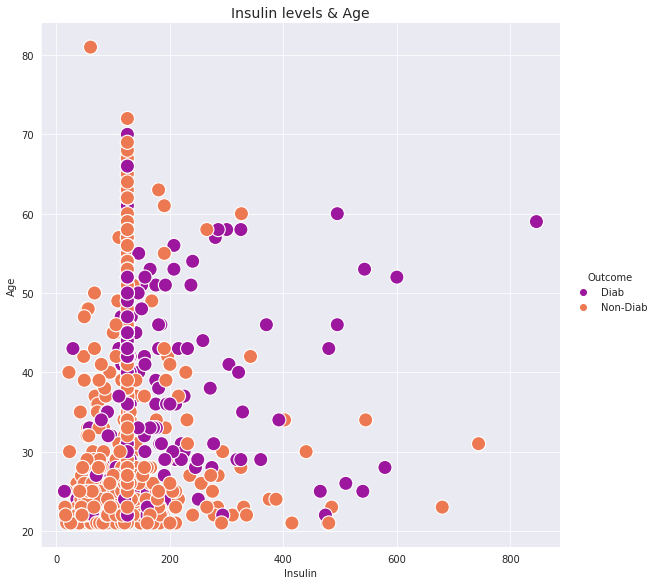

In [ ]:
plt.figure(dpi = 300)
sns.pairplot(df_copy, hue='Outcome', palette='plasma',x_vars='Insulin', y_vars='Age', size=8, plot_kws={"s": 200})
plt.title("Insulin levels & Age", fontsize=14)
plt.show()

<Figure size 1800x1200 with 0 Axes>

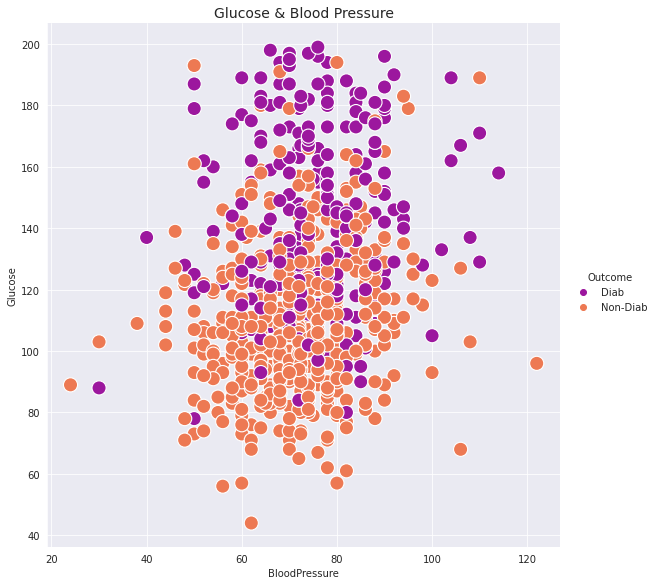

In [ ]:
plt.figure(dpi = 300)
sns.pairplot(df_copy, hue='Outcome', palette='plasma',x_vars='BloodPressure', y_vars='Glucose', size=8, plot_kws={"s": 200})
plt.title("Glucose & Blood Pressure", fontsize=14)
plt.show()

<Figure size 1800x1200 with 0 Axes>

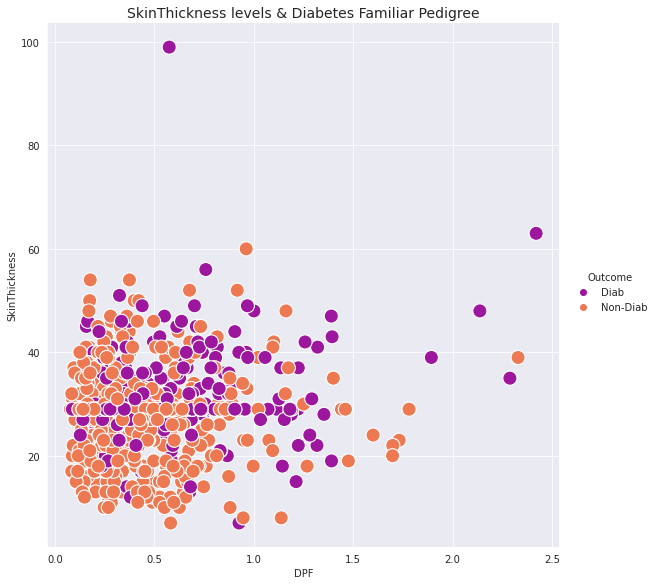

In [ ]:
plt.figure(dpi = 300)
sns.pairplot(df_copy, hue='Outcome', palette='plasma',x_vars='DPF', y_vars='SkinThickness', size=8, plot_kws={"s": 200})
plt.title("SkinThickness levels & Diabetes Familiar Pedigree", fontsize=14)
plt.show()

## Heatmap

Heatmaps are the visual representation of Correlation (Pearson's Correlation Coefficient), a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables.

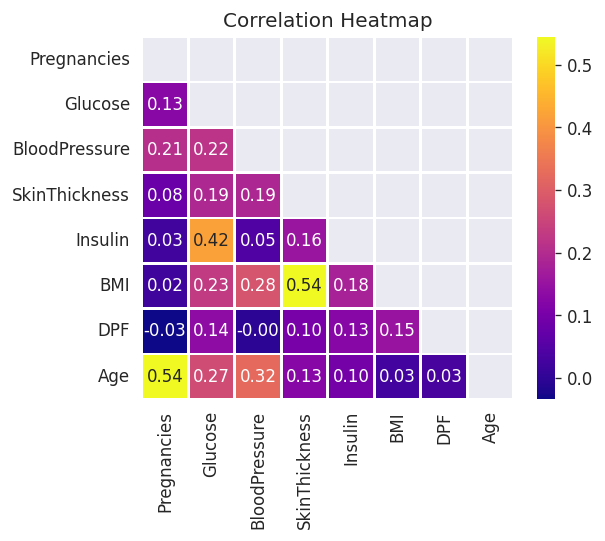

In [ ]:
#Correlations using Heatmap.

plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df_copy.corr(),dtype = bool))
sns.heatmap(df_copy.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Annotations: Besides "Age x Pregnancies", which is an obvious and non-explanatory correlation, its worth saving for further analysis:

- BMI x SkinThickness
- Insulin x Skinthickness.
- BMI x Bloodpressure. 

## Diabetes Familiar Pedigree 

We now set to expand on the observations taken from the Regression Pairplot and the Outcome Paiplot. This is, we attempt to superimpose the information attained from both: The *correlation between variables*, and the *distribution of diabetic outcomes within them*. 

We will be focusing on the Diabetes Familiar Pedigree (DPF) as explanatory (independent) variable, for two main reasons:

- It showed interesting correlation with 3 main Diabetes-related variables: Skinthickness (positive correlation), Insulin (negative outliers) and BMI (positive correlation).
- It promises great, non-obvious insights at the causality level analysis. 


Linear regression analysis is used to predict the value of a variable based on the value of another variable: Independent Variable x Dependent Variable.
We will proceed to combine the isolated plots. 

### DPF & Skinthickness

<Figure size 600x400 with 0 Axes>

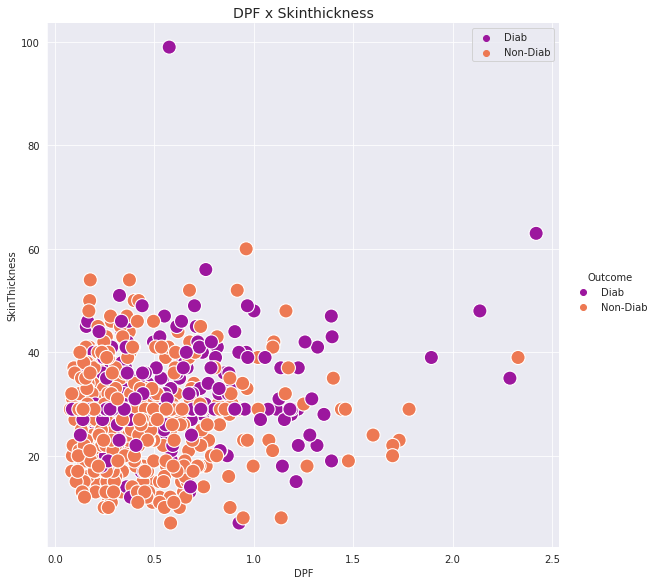

In [ ]:

plt.figure(dpi = 100)
sns.pairplot(df_copy, hue='Outcome', palette='plasma',x_vars='DPF', y_vars='SkinThickness', size=8, plot_kws={"s": 200})
plt.title("DPF x Skinthickness", fontsize=14)
plt.legend(loc='upper right')
plt.show()



<Figure size 3600x3000 with 0 Axes>

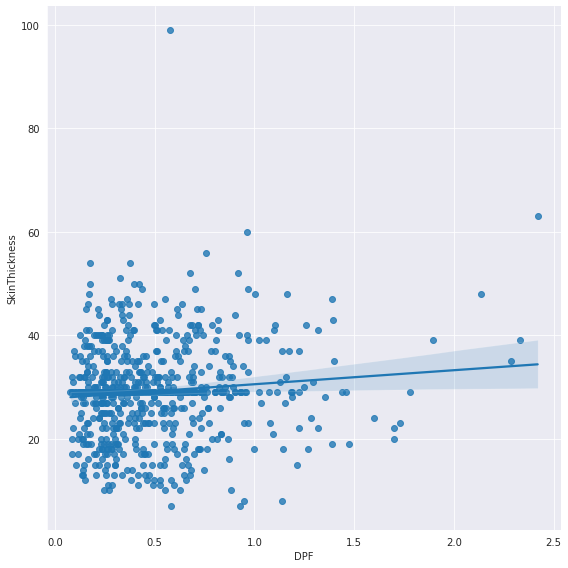

In [ ]:
plt.figure(dpi=300, figsize=(12,10))
sns.pairplot(df_copy, x_vars='DPF', y_vars='SkinThickness', kind = 'reg', palette='lime', size=8)
plt.show()

In [ ]:
# BubbleChart

fig = px.scatter(df_copy, x='DPF', y='SkinThickness',
	         size='BMI', log_x=True, hover_name='BMI', color='Outcome', size_max=60, title="DPF")


plt.show()

### DPF & Insulin

<Figure size 600x400 with 0 Axes>

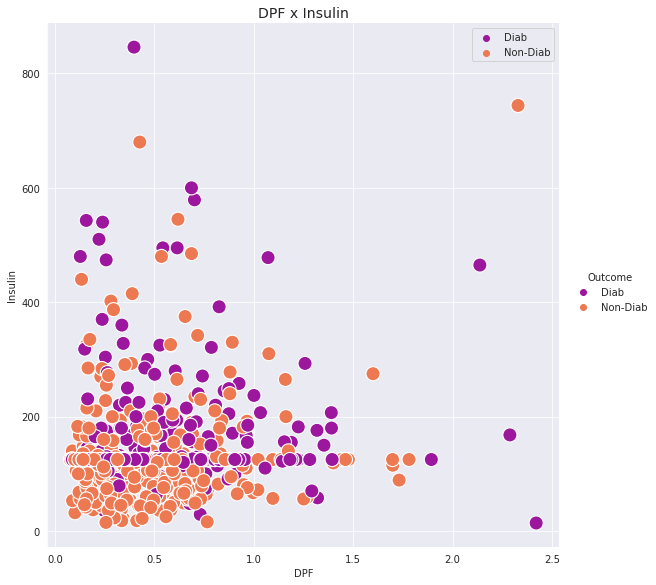

In [ ]:
plt.figure(dpi = 100)
sns.pairplot(df_copy, hue='Outcome', palette='plasma',x_vars='DPF', y_vars='Insulin', size=8, plot_kws={"s": 200})
plt.title("DPF x Insulin", fontsize=14)
plt.legend(loc='upper right')
plt.show()

<Figure size 3600x3000 with 0 Axes>

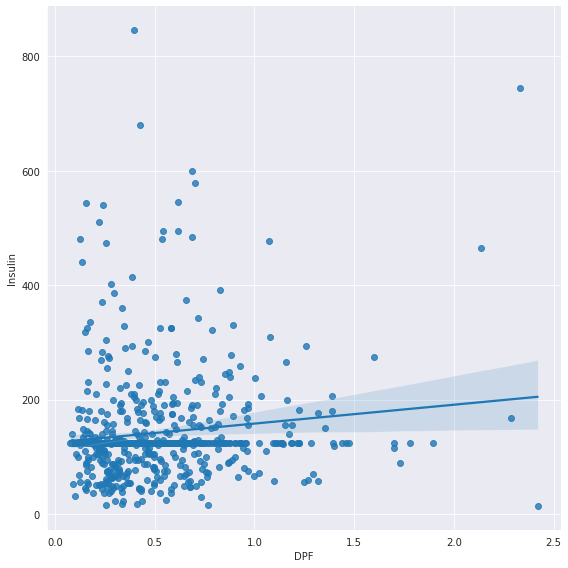

In [ ]:
plt.figure(dpi=300, figsize=(12,10))
sns.pairplot(df_copy, x_vars='DPF', y_vars='Insulin', kind = 'reg', palette='lime', size=8)
plt.show()

### DPF & BMI

<Figure size 600x400 with 0 Axes>

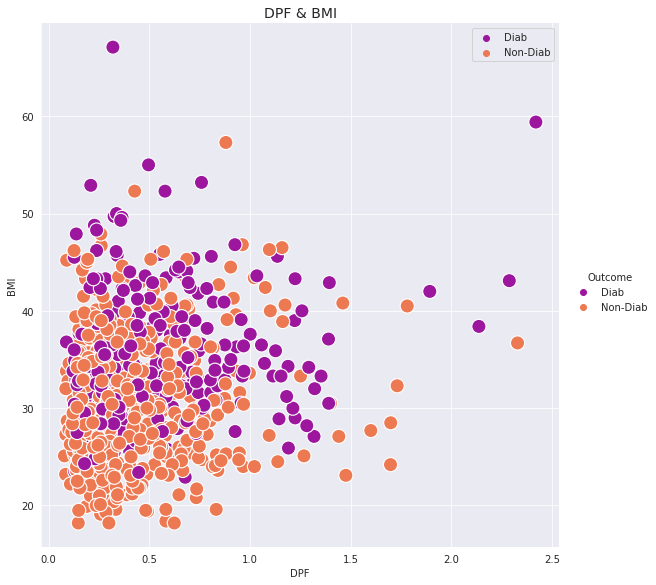

In [ ]:
plt.figure(dpi = 100)
sns.pairplot(df_copy, hue='Outcome', palette='plasma',x_vars='DPF', y_vars='BMI', size=8, plot_kws={"s": 200})
plt.title("DPF & BMI", fontsize=14)
plt.legend(loc='upper right')
plt.show()

<Figure size 3600x3000 with 0 Axes>

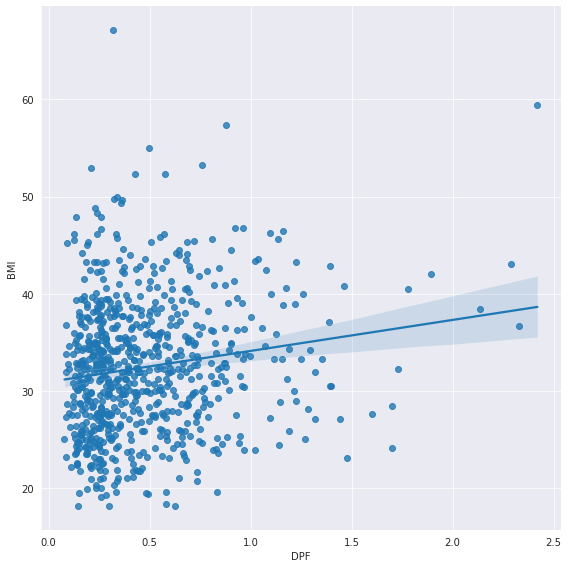

In [ ]:
plt.figure(dpi=300, figsize=(12,10))
sns.pairplot(df_copy, x_vars='DPF', y_vars='BMI', kind = 'reg', palette='lime', size=8)
plt.show()

# Next:

1 ) Thinking of use cases for scaled data.

2) Listing main insights:

- Self-explanatory due to illness nature (Glucose x Insulin x Diabetic)
- Self-explanatory due to human nature (Age x Bloodpressure)
- Potentially explanatory (Diabetes Pedigree familiar x "X" x Diabetic)

3) Comparing insights to available bibliography and research.

4 ) Extracting Conclusions. 